# main

Now I have dipole-dipole interactions, and I wanted to play with them. I rotate a $\mathbf{B}$ field around the $y$ axis, and set two particles on the $x$ axis. I expect to see them vibrate.

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import copy
import auxiliary as aux

mpl.rc("figure", dpi=150)
mpl.rc("figure", figsize=(4,4))

plt.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
    'xtick.labelsize':15,
    'ytick.labelsize':15,
    'axes.labelsize':20,
})

import os
import re

%reload_ext autoreload
%autoreload 2

In [2]:
# extra stuff
from matplotlib.ticker import FormatStrFormatter, ScalarFormatter
import math
from scipy.spatial import cKDTree  # For finding nearest neighbors

# formatting
formatter = ScalarFormatter(useMathText=True)
formatter.set_powerlimits((-2, 2))  # Sets limits for when to use scientific notation

In [17]:
# output directory
src_n = 3
dataDir = f'../data.lbm/0{src_n}/'
# dataDir = f'../src/0{src_n}/output.lbm/'

# all ticks are found using regular expressions
files = os.listdir(dataDir)
ticks = []

pattern = r'fluidTrj_(\d+)\.csv'

for file in files:
    match = re.search(pattern, file)
    if match:
        ticks.append(int(match.group(1)))
        
ticks.sort()

len(ticks)

2

# Fluid

In [18]:
id = -1
fluidDf = pd.read_csv(dataDir + f"fluidTrj_{ticks[id]}.csv").set_index(["id_x","id_y","id_z"]).sort_index()
particleDf = pd.read_csv(dataDir+"particlesTrj.csv")
particleDf.time.values[-1]

np.float64(1731.5172413795704)

In [ ]:
title = f'squirmer-bead-bead, $t = {fluidDf.time.values[-1]:0.1f}$'+' $\\mu \\mathrm{s}$'
fig, axes = aux.fluidOverview(fluidDf, particleDf, title)
plt.show()

In [ ]:
id = 1
fluidDf = pd.read_csv(dataDir + f"fluidTrj_{ticks[id]}.csv").set_index(["id_x","id_y"]).sort_index()
particleDf = pd.read_csv(dataDir+"particlesTrj.csv")

In [ ]:
title = f'squirmer-bead-bead, $t = {fluidDf.time.values[-1]:0.1f}$'+' $\\mu \\mathrm{s}$'
fig, axes = aux.fluidOverview(fluidDf, particleDf, title)
plt.show()

# particles

Due to the bonds, $\mathbf{r}_{12}$ and $\mathbf{r}_{23}$ must have remained roughly constant. Of course, some variation is acceptable, as well as equilibrium different to the initial conditions; everything's bound by harmonic potentials.

> **Note:** $\mathbf{r}_{ij} \equiv \mathbf{x}_i - \mathbf{x}_j$ is the separation vector between particles $i$ and $j$.

In [19]:
x1 = [
    particleDf.query("particleId == 1").position_x.values,
    particleDf.query("particleId == 1").position_y.values,
    particleDf.query("particleId == 1").position_z.values
]
x2 = [
    particleDf.query("particleId == 2").position_x.values,
    particleDf.query("particleId == 2").position_y.values,
    particleDf.query("particleId == 2").position_z.values
]

r12 = [x1[index] - x2[index] for index in np.arange(3)]

latticeParameter = fluidDf.coordinate_x.unique()[1] - fluidDf.coordinate_x.unique()[0]

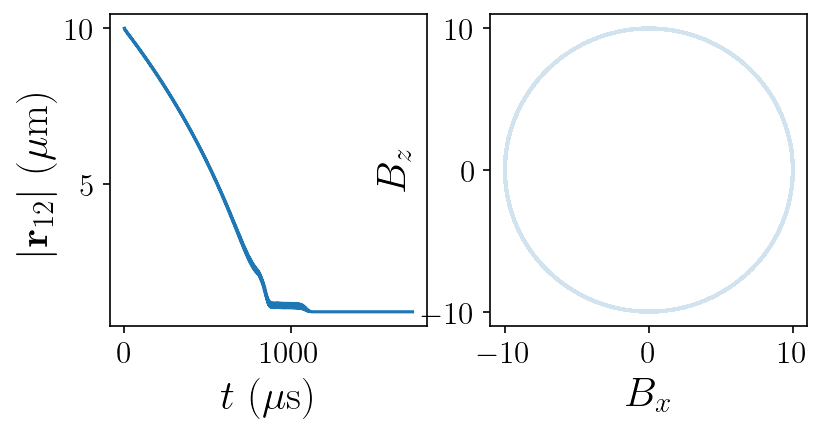

In [25]:
fig, axes = plt.subplots(1,2,figsize=(6,2.7))

axes[0].plot(
    particleDf.time.unique(),
    np.sqrt(r12[0]**2 + r12[1]**2 + r12[2]**2)
)
# axes[0].set_ylim(1-latticeParameter, 1+latticeParameter)
axes[0].set_xlabel("$t ~ (\\mu \\mathrm{s})$")
axes[0].set_ylabel("$|\\mathbf{r}_{12}| ~ (\\mu \\mathrm{m})$")

axes[1].plot(
    10 * np.sin(particleDf.time.unique() * 2 * np.pi / 10),
    10 * np.cos(particleDf.time.unique() * 2 * np.pi / 10),
alpha = 0.2)
axes[1].set_xlabel("$B_x$")
axes[1].set_ylabel("$B_z$")

plt.show()

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(6,2.7))

axes[1].plot(
    particleDf.time.unique(),
    10 * [np.cos(particleDf.time.unique() * 2 * np.pi / 10), np.sin(particleDf.time.unique() * 2 * np.pi / 10)]
)

In [ ]:
plt.plot(
    particleDf.time.unique(),
    np.acos(
        (r12[0]*r32[0] + r12[1]*r32[1]) / (
            np.sqrt(r12[0]*r12[0] + r12[1]*r12[1]) * np.sqrt(r12[0]*r12[0] + r12[1]*r12[1])
        )
        
    ) * 180/np.pi
)

plt.xlabel("$t ~ (\\mu \\mathrm{s})$")
plt.ylabel("$\\angle \\mathbf{x}_1 \\mathbf{x}_2 \\mathbf{x}_3 ~ (\\mathrm{deg})$")

plt.show()

# Stability analysis

In [26]:
def avgSpeed(df):
    return np.sqrt(df.fluidVelocity_x**2 + df.fluidVelocity_y**2).mean()

In [27]:
try:
    avgFluidSpeed 
except NameError:
    avgFluidSpeed = []
    
try:
    time 
except NameError:
    time = []

for tick in ticks[len(time)::]:
    auxDf = pd.read_csv(dataDir + f"fluidTrj_{tick}.csv")
    avgFluidSpeed.append(avgSpeed(auxDf))
    time.append(auxDf.time.values[0])
    print(f'\r{tick}', end='', flush=True)
print('\r'+' '*10, end='', flush=True)

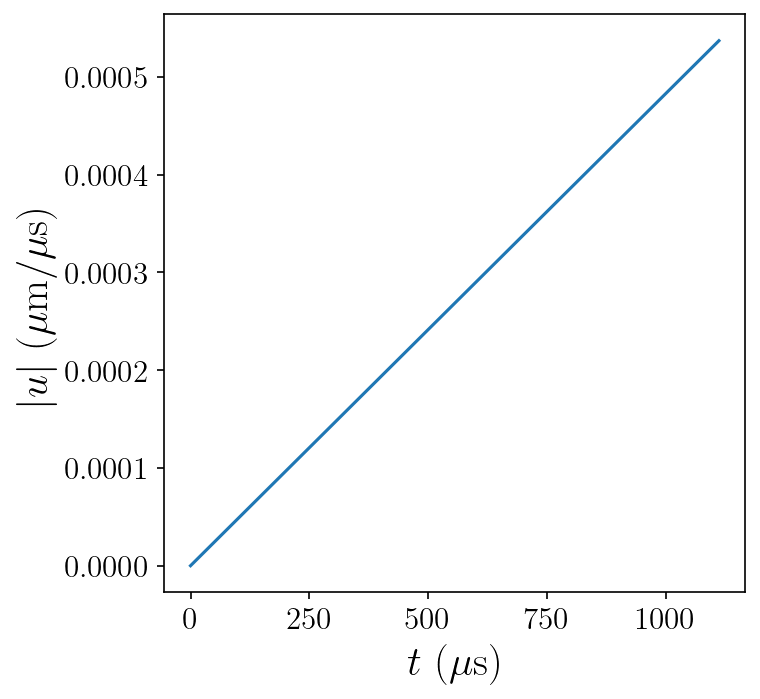

In [28]:
fig, ax = plt.subplots(figsize = (5,5))

ax.plot(time, avgFluidSpeed)
ax.set_xlabel("$t ~ (\\mu \\mathrm{s})$")
ax.set_ylabel("$|u| ~ (\\mu \\mathrm{m} / \\mu \\mathrm{s})$")

plt.show()

# Animation

In [ ]:
# necessary directories are created
outputDir = f"frames.{src_n}"
os.system(f'mkdir -p anims')
os.system(f'mkdir {outputDir}')

# the data is read and frames are saved
particleDf = pd.read_csv(dataDir+"particlesTrj.csv")
for tickId in np.arange(len(ticks)):
    fluidDf = pd.read_csv(dataDir + f"fluidTrj_{ticks[tickId]}.csv").set_index(["id_x","id_y"]).sort_index()
    title = f'squirmer-bead-bead, $t = {fluidDf.time.values[-1]:.0f}$'+' $\\mu \\mathrm{s}$'
    fig, axes = aux.fluidOverview(fluidDf, particleDf, title)

    plt.savefig(f"{outputDir}/{tickId}.png", format="png", dpi=300, bbox_inches="tight")
    plt.close()
    print(f'\r{tickId}', end='', flush=True)
print('\r'+' '*10, end='', flush=True)

# ffmpeg is used to create the animation
mkAnimSh = f'ffmpeg -framerate 25 -i {outputDir}/%d.png -vf "scale=trunc(iw/2)*2:trunc(ih/2)*2" -c:v libx264 -pix_fmt yuv420p -loglevel quiet anims/src_0{src_n}.mp4'
os.system(mkAnimSh)

# the directory with the frames is erased
os.system(f'rm -r {outputDir}')